In [3]:
import numpy as np
import matplotlib.pyplot as plt
import pandas as pd

ruta='/content/drive/MyDrive/Ingeniería y Ciencia de Datos/Segundo Semestre/Ingeniería de Características/Colab Notebooks/'
df_paises=pd.read_csv(ruta+'Países.csv')
df_paises.head()

,Países
0,MEX
1,CHN
2,CAN
3,POL
4,CPV


In [2]:
from google.colab import drive
drive.mount('/content/drive')

Mounted at /content/drive


In [4]:
# Cardinalidad
n=len(df_paises['Países'].unique())
n

91

In [5]:
observaciones=len(df_paises)
observaciones

560

In [6]:
0.8*observaciones,0.2*n

(448.0, 18.2)

<Axes: >

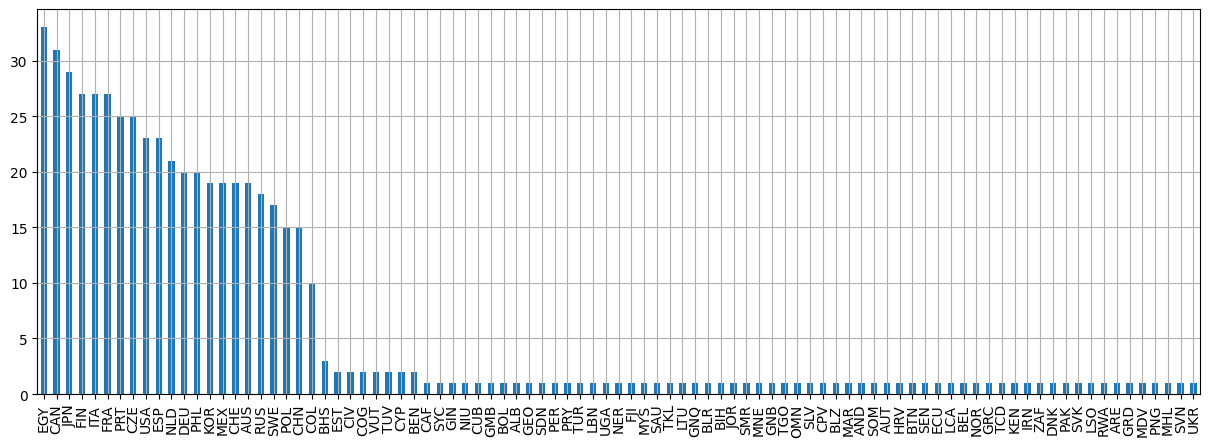

In [7]:
conteo=df_paises['Países'].value_counts()
conteo.plot.bar(figsize=(15,5),grid=True)

<Axes: >

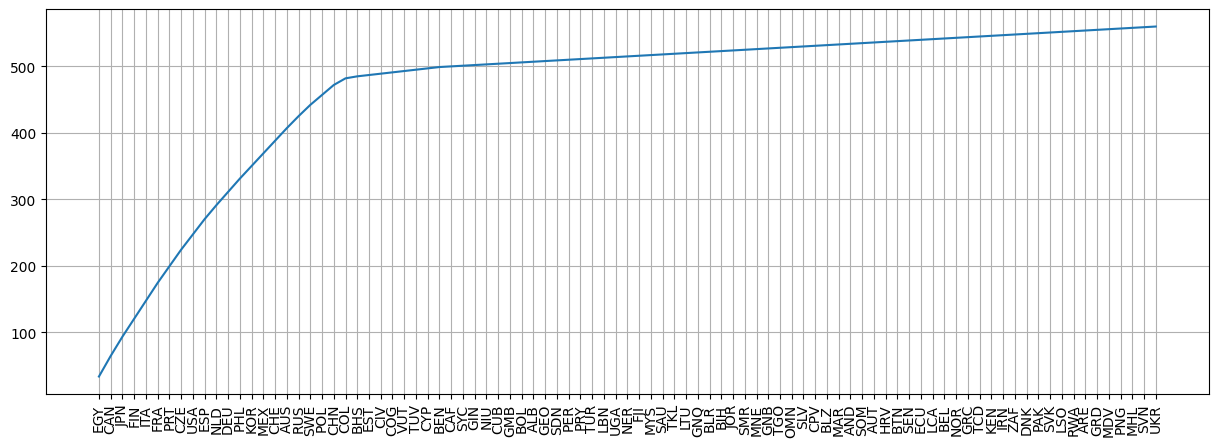

In [8]:
suma=conteo.cumsum()
suma.plot(figsize=(15,5),grid=True,xticks=range(n),rot=90)

In [9]:
np.where(suma<0.8*observaciones)[0][-1] # Las 19 categorías más numerosas se acercan al 80% d

18

In [10]:
np.where(suma>0.8*observaciones)[0][0] # Las primeras 20 categorías superal el 80% de las observaciones

19

## Reducción de categorías (Feature Hashing)

In [13]:
m = 20
Conjunto_paises = conteo.index
keys ={pais:id for pais, id in zip(Conjunto_paises,range(n))}
keys

{'EGY': 0,
 'CAN': 1,
 'JPN': 2,
 'FIN': 3,
 'ITA': 4,
 'FRA': 5,
 'PRT': 6,
 'CZE': 7,
 'USA': 8,
 'ESP': 9,
 'NLD': 10,
 'DEU': 11,
 'PHL': 12,
 'KOR': 13,
 'MEX': 14,
 'CHE': 15,
 'AUS': 16,
 'RUS': 17,
 'SWE': 18,
 'POL': 19,
 'CHN': 20,
 'COL': 21,
 'BHS': 22,
 'EST': 23,
 'CIV': 24,
 'COG': 25,
 'VUT': 26,
 'TUV': 27,
 'CYP': 28,
 'BEN': 29,
 'CAF': 30,
 'SYC': 31,
 'GIN': 32,
 'NIU': 33,
 'CUB': 34,
 'GMB': 35,
 'BOL': 36,
 'ALB': 37,
 'GEO': 38,
 'SDN': 39,
 'PER': 40,
 'PRY': 41,
 'TUR': 42,
 'LBN': 43,
 'UGA': 44,
 'NER': 45,
 'FJI': 46,
 'MYS': 47,
 'SAU': 48,
 'TKL': 49,
 'LTU': 50,
 'GNQ': 51,
 'BLR': 52,
 'BIH': 53,
 'JOR': 54,
 'SMR': 55,
 'MNE': 56,
 'GNB': 57,
 'TGO': 58,
 'OMN': 59,
 'SLV': 60,
 'CPV': 61,
 'BLZ': 62,
 'MAR': 63,
 'AND': 64,
 'SOM': 65,
 'AUT': 66,
 'HRV': 67,
 'BTN': 68,
 'SEN': 69,
 'ECU': 70,
 'LCA': 71,
 'BEL': 72,
 'NOR': 73,
 'GRC': 74,
 'TCD': 75,
 'KEN': 76,
 'IRN': 77,
 'ZAF': 78,
 'DNK': 79,
 'PAK': 80,
 'SVK': 81,
 'LSO': 82,
 'RWA': 83,
 '

In [14]:
#@title Función Hash 1
#
Hash_fcn_1={pais:key%m for pais,key in keys.items()}
Hash_fcn_1

{'EGY': 0,
 'CAN': 1,
 'JPN': 2,
 'FIN': 3,
 'ITA': 4,
 'FRA': 5,
 'PRT': 6,
 'CZE': 7,
 'USA': 8,
 'ESP': 9,
 'NLD': 10,
 'DEU': 11,
 'PHL': 12,
 'KOR': 13,
 'MEX': 14,
 'CHE': 15,
 'AUS': 16,
 'RUS': 17,
 'SWE': 18,
 'POL': 19,
 'CHN': 0,
 'COL': 1,
 'BHS': 2,
 'EST': 3,
 'CIV': 4,
 'COG': 5,
 'VUT': 6,
 'TUV': 7,
 'CYP': 8,
 'BEN': 9,
 'CAF': 10,
 'SYC': 11,
 'GIN': 12,
 'NIU': 13,
 'CUB': 14,
 'GMB': 15,
 'BOL': 16,
 'ALB': 17,
 'GEO': 18,
 'SDN': 19,
 'PER': 0,
 'PRY': 1,
 'TUR': 2,
 'LBN': 3,
 'UGA': 4,
 'NER': 5,
 'FJI': 6,
 'MYS': 7,
 'SAU': 8,
 'TKL': 9,
 'LTU': 10,
 'GNQ': 11,
 'BLR': 12,
 'BIH': 13,
 'JOR': 14,
 'SMR': 15,
 'MNE': 16,
 'GNB': 17,
 'TGO': 18,
 'OMN': 19,
 'SLV': 0,
 'CPV': 1,
 'BLZ': 2,
 'MAR': 3,
 'AND': 4,
 'SOM': 5,
 'AUT': 6,
 'HRV': 7,
 'BTN': 8,
 'SEN': 9,
 'ECU': 10,
 'LCA': 11,
 'BEL': 12,
 'NOR': 13,
 'GRC': 14,
 'TCD': 15,
 'KEN': 16,
 'IRN': 17,
 'ZAF': 18,
 'DNK': 19,
 'PAK': 0,
 'SVK': 1,
 'LSO': 2,
 'RWA': 3,
 'ARE': 4,
 'GRD': 5,
 'MDV': 6,
 'P

In [15]:
df_paises['Países_Hash_1']=df_paises['Países'].map(Hash_fcn_1)
len(df_paises['Países_Hash_1'].unique()) # Cardinalidad de 'Países' codificada

20

In [16]:
#@title Función Hash 2
#
conteo[:21] # Usamos como codificación el número de apariciones de los países asociados a 'key%m'
            # key%m=0  ->  33+15+...  EGY+CHN+...

EGY    33
CAN    31
JPN    29
FIN    27
ITA    27
FRA    27
PRT    25
CZE    25
USA    23
ESP    23
NLD    21
DEU    20
PHL    20
KOR    19
MEX    19
CHE    19
AUS    19
RUS    18
SWE    17
POL    15
CHN    15
Name: Países, dtype: int64

In [17]:
contador=[0]*m
for pais,key in keys.items():
  contador[key%m] += conteo[pais]
contador

[51,
 44,
 35,
 32,
 32,
 32,
 30,
 30,
 28,
 28,
 25,
 23,
 23,
 22,
 22,
 22,
 22,
 21,
 20,
 18]

In [18]:
Hash_fcn_2={pais:contador[key%m] for pais,key in keys.items()}
Hash_fcn_2

{'EGY': 51,
 'CAN': 44,
 'JPN': 35,
 'FIN': 32,
 'ITA': 32,
 'FRA': 32,
 'PRT': 30,
 'CZE': 30,
 'USA': 28,
 'ESP': 28,
 'NLD': 25,
 'DEU': 23,
 'PHL': 23,
 'KOR': 22,
 'MEX': 22,
 'CHE': 22,
 'AUS': 22,
 'RUS': 21,
 'SWE': 20,
 'POL': 18,
 'CHN': 51,
 'COL': 44,
 'BHS': 35,
 'EST': 32,
 'CIV': 32,
 'COG': 32,
 'VUT': 30,
 'TUV': 30,
 'CYP': 28,
 'BEN': 28,
 'CAF': 25,
 'SYC': 23,
 'GIN': 23,
 'NIU': 22,
 'CUB': 22,
 'GMB': 22,
 'BOL': 22,
 'ALB': 21,
 'GEO': 20,
 'SDN': 18,
 'PER': 51,
 'PRY': 44,
 'TUR': 35,
 'LBN': 32,
 'UGA': 32,
 'NER': 32,
 'FJI': 30,
 'MYS': 30,
 'SAU': 28,
 'TKL': 28,
 'LTU': 25,
 'GNQ': 23,
 'BLR': 23,
 'BIH': 22,
 'JOR': 22,
 'SMR': 22,
 'MNE': 22,
 'GNB': 21,
 'TGO': 20,
 'OMN': 18,
 'SLV': 51,
 'CPV': 44,
 'BLZ': 35,
 'MAR': 32,
 'AND': 32,
 'SOM': 32,
 'AUT': 30,
 'HRV': 30,
 'BTN': 28,
 'SEN': 28,
 'ECU': 25,
 'LCA': 23,
 'BEL': 23,
 'NOR': 22,
 'GRC': 22,
 'TCD': 22,
 'KEN': 22,
 'IRN': 21,
 'ZAF': 20,
 'DNK': 18,
 'PAK': 51,
 'SVK': 44,
 'LSO': 35,
 'RW

In [19]:
df_paises['Países_Hash_2']=df_paises['Países'].map(Hash_fcn_2)
len(df_paises['Países_Hash_2'].unique())

12

In [20]:
#@title MurMurHash3 de 32 bits
from sklearn.feature_extraction import FeatureHasher

In [21]:
hasher=FeatureHasher(m)
cod_murmurhash3=hasher.fit_transform([keys])
cod_murmurhash3.toarray()

array([[ -98.,   94.,   59.,    7.,   69., -207.,  139.,  -44.,   21.,
         -40.,  -38.,  -50.,   29., -251.,  264.,   86.,   19., -208.,
         136.,  272.]])

In [22]:
Hash_fcn_3={pais:cod_murmurhash3.toarray()[0][key%m] for pais,key in keys.items()}
Hash_fcn_3

{'EGY': -98.0,
 'CAN': 94.0,
 'JPN': 59.0,
 'FIN': 7.0,
 'ITA': 69.0,
 'FRA': -207.0,
 'PRT': 139.0,
 'CZE': -44.0,
 'USA': 21.0,
 'ESP': -40.0,
 'NLD': -38.0,
 'DEU': -50.0,
 'PHL': 29.0,
 'KOR': -251.0,
 'MEX': 264.0,
 'CHE': 86.0,
 'AUS': 19.0,
 'RUS': -208.0,
 'SWE': 136.0,
 'POL': 272.0,
 'CHN': -98.0,
 'COL': 94.0,
 'BHS': 59.0,
 'EST': 7.0,
 'CIV': 69.0,
 'COG': -207.0,
 'VUT': 139.0,
 'TUV': -44.0,
 'CYP': 21.0,
 'BEN': -40.0,
 'CAF': -38.0,
 'SYC': -50.0,
 'GIN': 29.0,
 'NIU': -251.0,
 'CUB': 264.0,
 'GMB': 86.0,
 'BOL': 19.0,
 'ALB': -208.0,
 'GEO': 136.0,
 'SDN': 272.0,
 'PER': -98.0,
 'PRY': 94.0,
 'TUR': 59.0,
 'LBN': 7.0,
 'UGA': 69.0,
 'NER': -207.0,
 'FJI': 139.0,
 'MYS': -44.0,
 'SAU': 21.0,
 'TKL': -40.0,
 'LTU': -38.0,
 'GNQ': -50.0,
 'BLR': 29.0,
 'BIH': -251.0,
 'JOR': 264.0,
 'SMR': 86.0,
 'MNE': 19.0,
 'GNB': -208.0,
 'TGO': 136.0,
 'OMN': 272.0,
 'SLV': -98.0,
 'CPV': 94.0,
 'BLZ': 59.0,
 'MAR': 7.0,
 'AND': 69.0,
 'SOM': -207.0,
 'AUT': 139.0,
 'HRV': -44.0,
 '

In [23]:
df_paises['Hash_fcn_3']=df_paises['Países'].map(Hash_fcn_3)
len(df_paises['Hash_fcn_3'].unique())

20

In [24]:
# MurMurHash3 con otra codificación
#
!pip install category-encoders

     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 81.9/81.9 kB 2.6 MB/s eta 0:00:00


In [25]:
from category_encoders import HashingEncoder

In [26]:
hasher_2=HashingEncoder(n_components=m,cols=['Países'])
hasher_2.fit_transform(df_paises)

,col_0,col_1,col_2,col_3,col_4,col_5,col_6,col_7,col_8,col_9,...,col_13,col_14,col_15,col_16,col_17,col_18,col_19,Países_Hash_1,Países_Hash_2,Hash_fcn_3
0,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,14,22,264.0
1,0,0,1,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,51,-98.0
2,0,0,0,0,0,0,0,0,0,0,...,0,0,1,0,0,0,0,1,44,94.0
3,1,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,19,18,272.0
4,0,0,0,0,0,0,0,1,0,0,...,0,0,0,0,0,0,0,1,44,94.0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
555,0,0,0,0,0,0,0,0,0,0,...,0,0,1,0,0,0,0,10,25,-38.0
556,0,0,0,0,0,1,0,0,0,0,...,0,0,0,0,0,0,0,0,51,-98.0
557,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,15,22,86.0
558,0,1,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,5,32,-207.0
